In [39]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [40]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [41]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [42]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [43]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect= True)
# reflect the tables
Base.classes.keys()


['measurement', 'station']

In [44]:
# View all of the classes that automap found
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [45]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [46]:
# Create our session (link) from Python to the DB
session= Session(engine)

# Exploratory Precipitation Analysis

In [47]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [48]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
lastyear= dt.date(2017,8,23)- dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
last12months=session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > lastyear).\
order_by(Measurement.date).all()

In [49]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# set index to "Date" column, sort values by "Date"
last_year_prcp= pd.DataFrame(last12months)
last_year_prcp.columns=["Date", "PRCP"]
last_year_prcp.set_index("Date")
last_year_prcp.sort_values(by=["Date"])

,Date,PRCP
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2221,2017-08-23,0.08
2219,2017-08-23,0.00
2220,2017-08-23,0.00


ConversionError: Failed to convert value(s) to axis units: 0       2016-08-24
1       2016-08-24
2       2016-08-24
3       2016-08-24
4       2016-08-24
           ...    
2218    2017-08-22
2219    2017-08-23
2220    2017-08-23
2221    2017-08-23
2222    2017-08-23
Name: Date, Length: 2223, dtype: object

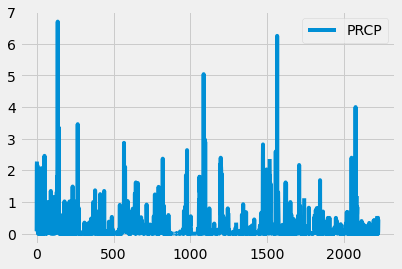

In [74]:
# Use Pandas Plotting with Matplotlib to plot the data
#x_axis= last_year_prcp["Date"]
#y_axis= last_year_prcp["PRCP"]

#plt.bar(x_axis, y_axis)
#plt.title("Precipitation From Aug.2016-Aug.2017")
#plt.xlabel("Date")
#plt.ylabel("Inches")
#ax.set_xticks([10])
#plt.show()
ypos= last_year_prcp["PRCP"]
xpos= last_year_prcp["Date"]
fig,ax = plt.subplots()
last_year_prcp.plot(ax = ax)
ax.set_xticks(xpos)
ax.set_yticks(ypos)
#ax.set_xticklabels([2])
ax.set_title("Precipitation From Aug.2016-Aug.2017")

ax.set_ylabel("Inches")
ax.set_xlabel("Date")
plt.show()

In [51]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last_year_prcp["PRCP"].describe()


count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: PRCP, dtype: float64

# Exploratory Station Analysis

In [52]:
# Design a query to calculate the total number stations in the dataset
total_stations=session.query(Station.station).count()
total_stations

9

In [82]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_counts= session.query(Measurement.station, func.count()).\
    group_by(Measurement.station).all()

station_counts_df= pd.DataFrame(station_counts)
station_counts_df.columns=["Station No.", "Times Recorded"]
station_counts_df.sort_values(by= "Times Recorded", ascending=False)


,Station No.,Times Recorded
6,USC00519281,2772
7,USC00519397,2724
1,USC00513117,2709
8,USC00519523,2669
3,USC00516128,2612
2,USC00514830,2202
0,USC00511918,1979
4,USC00517948,1372
5,USC00518838,511


In [87]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_max= session.query(func.max(Measurement).filter(station=='USC00519281').all()

SyntaxError: unexpected EOF while parsing (<ipython-input-87-f2104a6945d1>, line 2)

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()